In [1]:
import pandas as pd
from datetime import datetime
import matplotlib
import re
from nltk.tokenize import word_tokenize
from string import punctuation 
from nltk.corpus import stopwords 

## Read in data 

### Market data

In [2]:
btc_market = pd.read_csv("data/BTC-USD-80.csv")
btc_market.head()

,time,close,high,low,open,volumefrom,volumeto,mid
0,1582984800,8645.88,8678.25,8606.31,8676.27,954.50,8238841.34,8642.280
1,1582988400,8693.73,8708.76,8619.73,8645.88,785.84,6824127.12,8664.245
2,1582992000,8638.05,8702.50,8630.15,8693.73,761.92,6629631.43,8666.325
3,1582995600,8701.21,8702.40,8623.94,8638.05,951.78,8259525.21,8663.170
4,1582999200,8695.56,8714.49,8666.65,8701.21,556.50,4862181.37,8690.570


#### Convert unix code time to more readable datetime format

In [3]:
btc_market['time_formatted'] = pd.to_datetime(btc_market['time'], unit='s')

In [4]:
btc_market[['time', 'time_formatted']].head()

,time,time_formatted
0,1582984800,2020-02-29 14:00:00
1,1582988400,2020-02-29 15:00:00
2,1582992000,2020-02-29 16:00:00
3,1582995600,2020-02-29 17:00:00
4,1582999200,2020-02-29 18:00:00


### Volatility data

In [5]:
btc_volatility = pd.read_csv("data/vcrix_80.csv")
btc_volatility.head()

,Unnamed: 0,n,date,vcrix
0,1,1,2014-11-28,1000.000000
1,2,2,2014-11-29,965.979876
2,3,3,2014-11-30,959.594373
3,4,4,2014-12-01,959.594373
4,5,5,2014-12-02,934.643276


In [6]:
btc_volatility['date'] = pd.to_datetime(btc_volatility['date'])

In [7]:
btc_volatility.drop(columns=['Unnamed: 0', 'n'], inplace=True)

In [8]:
btc_volatility = btc_volatility[(btc_volatility['date'] >= '2020-01-01') & (btc_volatility['date'] < '2020-05-01')]
btc_volatility

,date,vcrix
1860,2020-01-01,564.354535
1861,2020-01-02,560.908175
1862,2020-01-03,558.592397
1863,2020-01-04,574.417128
1864,2020-01-05,615.550024
...,...,...
1976,2020-04-26,751.485069
1977,2020-04-27,760.157884
1978,2020-04-28,738.696092
1979,2020-04-29,737.977159


### Trend

In [9]:
btc_trend = pd.read_csv('data/BTC_trend.csv')
btc_trend

,date,Bitcoin,BTC,isPartial
0,2020-01-01 00:00:00,49,13,False
1,2020-01-01 01:00:00,46,13,False
2,2020-01-01 02:00:00,43,14,False
3,2020-01-01 03:00:00,0,0,False
4,2020-01-01 04:00:00,0,0,False
...,...,...,...,...
3641,2020-05-30 20:00:00,52,13,False
3642,2020-05-30 21:00:00,59,13,False
3643,2020-05-30 22:00:00,57,15,False
3644,2020-05-30 23:00:00,60,16,False


In [10]:
btc_trend['date'] = pd.to_datetime(btc_trend['date'])
btc_trend['date'].head()

0   2020-01-01 00:00:00
1   2020-01-01 01:00:00
2   2020-01-01 02:00:00
3   2020-01-01 03:00:00
4   2020-01-01 04:00:00
Name: date, dtype: datetime64[ns]

### Tweets

In [11]:
# stopwords for cleaning
stopwords = set(stopwords.words('english') + list(punctuation) + ['AT_USER','URL'])

In [12]:
# cleaning method for tweets
def processTweet(tweet):
    if isinstance(tweet, str):
        tweet = tweet.lower() # convert text to lower-case
        tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', 'URL', tweet) # remove URLs
        tweet = re.sub('@[^\s]+', 'AT_USER', tweet) # remove usernames
        tweet = re.sub(r'#([^\s]+)', r'\1', tweet) # remove the # in #hashtag
        tweet = word_tokenize(tweet) # remove repeated characters (helloooooooo into hello)
        return [word for word in tweet if word not in stopwords]
    else:
        print(tweet)
        return tweet

In [13]:
def processTweets(chunk):
    processedTweets = []
    #print(list_of_tweets)
    for tweet in chunk['text']:
        processedTweets.append(processTweet(tweet))
    return processedTweets

In [14]:
# read the large csv file with specified chunksize 
df_chunk = pd.read_csv('data/combined_tweets.csv', chunksize=50000)

#df_chunk = pd.read_csv('data/by_day/tweets_btc_2020-05-12.csv', chunksize=500)

In [15]:
chunk_list = []  # append each chunk df here 

# Each chunk is in df format
for chunk in df_chunk:  
    # perform data filtering 
    chunk_text_filtered = processTweets(chunk)

    # set filtered text
    chunk['text'] = chunk_text_filtered
    
    # Once the data filtering is done, append the chunk to list
    chunk_list.append(chunk)
    
# concat the list into dataframe 
btc_tweets = pd.concat(chunk_list)

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


In [16]:
btc_tweets.head()

,Unnamed: 0,has_media,hashtags,img_urls,is_replied,is_reply_to,likes,links,parent_tweet_id,replies,...,screen_name,text,text_html,timestamp,timestamp_epochs,tweet_id,tweet_url,user_id,username,video_url
0,0.0,False,"['bitcoin', 'shorts', 'liquidated', 'Iran', 'W...",[],False,False,2,[],NaN,0,...,CryptoDivision,"[bitcoin, jumps, first, due, shorts, liquidate...","<p class=""TweetTextSize js-tweet-text tweet-te...",2020-01-03 23:59:55,2020-01-03 23:59:55,1213248655320326144,/CryptoDivision/status/1213248655320326144,890003583231418368,TheCryptoDivision,NaN
1,1.0,False,"['bitcoin', 'BTC']",[],False,False,0,[],NaN,0,...,GetTheCrypto1,"[bitcoin, cryptocurrencies, real, money, btc-,...","<p class=""TweetTextSize js-tweet-text tweet-te...",2020-01-03 23:59:47,2020-01-03 23:59:47,1213248621438754816,/GetTheCrypto1/status/1213248621438754820,1105237963426816000,GetTheCrypto,NaN
2,2.0,False,[],[],False,True,1,[],1.213121e+18,0,...,zhtttttty4,"[started, two, years, ago, stock, market, loss...","<p class=""TweetTextSize js-tweet-text tweet-te...",2020-01-03 23:59:23,2020-01-03 23:59:23,1213248523585478656,/zhtttttty4/status/1213248523585478656,1186910416313737216,zhtttttty,NaN
3,3.0,False,['Bitcoin'],[],False,False,4,[],NaN,0,...,WhaleTrades,"[bitmex, btc, whale, 4,973,247, worth, bitcoin...","<p class=""TweetTextSize js-tweet-text tweet-te...",2020-01-03 23:59:05,2020-01-03 23:59:05,1213248448553730048,/WhaleTrades/status/1213248448553730048,968796006576947200,WhaleTrades 🐳,NaN
4,4.0,False,"['Bitcoin', 'BTC']",[],False,False,0,[],NaN,0,...,reqBitcoinJS,"[jan, 3, 2020, 23:58:00, utc, 7,326, usd, €6,5...","<p class=""TweetTextSize js-tweet-text tweet-te...",2020-01-03 23:58:57,2020-01-03 23:58:57,1213248411417370624,/reqBitcoinJS/status/1213248411417370624,1082323663238713344,Bitcoin.js //Bitcoin price every half hour,NaN


In [17]:
# sort by date 
btc_tweets.sort_values(by='timestamp', inplace=True)

In [18]:
btc_tweets.shape

(588008, 22)

In [19]:
btc_tweets.columns

Index(['Unnamed: 0', 'has_media', 'hashtags', 'img_urls', 'is_replied',
       'is_reply_to', 'likes', 'links', 'parent_tweet_id', 'replies',
       'reply_to_users', 'retweets', 'screen_name', 'text', 'text_html',
       'timestamp', 'timestamp_epochs', 'tweet_id', 'tweet_url', 'user_id',
       'username', 'video_url'],
      dtype='object')

In [20]:
btc_tweets.drop(columns='Unnamed: 0', inplace=True)

In [21]:
btc_tweets['timestamp'] = pd.to_datetime(btc_tweets['timestamp'])


In [22]:
# check if duplicate tweets exist
len(btc_tweets['tweet_id']) != len(set(btc_tweets['tweet_id']))

True

In [23]:
# drop all rows with duplicate tweet id
btc_tweets.drop_duplicates(subset ="tweet_id", inplace = True)

# check again if duplicate tweets exist
len(btc_tweets['tweet_id']) != len(set(btc_tweets['tweet_id']))

False

In [24]:
btc_tweets.shape

(585371, 21)

## Test by day

In [25]:
btc_tweets_by_day = pd.read_json("data/by_day/tweets_btc_2020-03-13.json", encoding='utf-8')
btc_tweets_by_day.shape

(4005, 21)

In [26]:
btc_tweets_by_day.head()

,has_media,hashtags,img_urls,is_replied,is_reply_to,likes,links,parent_tweet_id,replies,reply_to_users,...,screen_name,text,text_html,timestamp,timestamp_epochs,tweet_id,tweet_url,user_id,username,video_url
0,False,"[XBT, BTC, Bitcoin]",[],False,False,1,[http://www.xbt.money/new-version-of-crypto-wa...,,0,[],...,xbtmoney,New version of crypto wallet QPocket adds cold...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-03-13 23:59:59,2020-03-13 23:59:59,1238615823297593344,/xbtmoney/status/1238615823297593344,199453782,XBTmoney,
1,True,[bitcoin],[https://pbs.twimg.com/media/ETBx3sIXQAYvSTD.jpg],True,False,19,[],,3,[],...,Karalhoin,This is all I have to say given known current ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-03-13 23:59:52,2020-03-13 23:59:52,1238615793291706368,/Karalhoin/status/1238615793291706368,175960015,Vandelay BTC Industries,
2,False,"[cryptocurrency, crypto, blockchain, Bitcoin, ...",[],False,False,0,[https://www.quora.com/How-much-do-you-believe...,,0,[],...,arstech_biz,My answer to How much do you believe the idea ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-03-13 23:59:36,2020-03-13 23:59:36,1238615726379814912,/arstech_biz/status/1238615726379814912,962117889028272128,arstech.biz,
3,False,"[HODL, boomers, BTC]",[],False,True,0,[],1238608438797701121,0,"[{'screen_name': 'Bitcoin', 'user_id': '357312...",...,edja7772,"I know it is scarry! However, #HODL is the onl...","<p class=""TweetTextSize js-tweet-text tweet-te...",2020-03-13 23:59:28,2020-03-13 23:59:28,1238615695530905600,/edja7772/status/1238615695530905600,298805664,Edgar,
4,False,"[Trump, Stocks, Bitcoin, Cryptocurrencies, Dow...",[],False,False,0,[https://www.visionary-finance.com/news/Trump-...,,0,[],...,VisionaryFinanc,#Trump Declares National Emergency & #Stocks R...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-03-13 23:59:28,2020-03-13 23:59:28,1238615695371522048,/VisionaryFinanc/status/1238615695371522049,859252235804520448,VF,


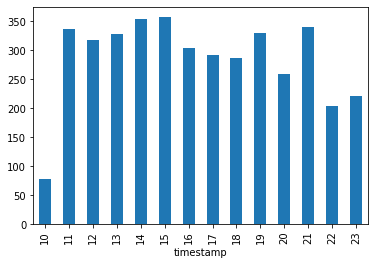

In [27]:
btc_tweets_by_day['timestamp'].groupby(btc_tweets_by_day["timestamp"].dt.hour).count().plot(kind="bar")

### Merge two data frames

In [28]:
# first merge tweets with hourly trend data
btc_merged_hourly = pd.merge_asof(btc_tweets, btc_trend, left_on='timestamp', right_on='date', direction='backward')
btc_merged_hourly.head()

,has_media,hashtags,img_urls,is_replied,is_reply_to,likes,links,parent_tweet_id,replies,reply_to_users,...,timestamp_epochs,tweet_id,tweet_url,user_id,username,video_url,date,Bitcoin,BTC,isPartial
0,False,['BTC'],[],False,False,2,['https://crypto.press/coins/BTC-bitcoin'],NaN,0,[],...,2020-01-01 00:00:00,1212161514226036736,/CryptoPressNews/status/1212161514226036736,24411256,Crypto Press,NaN,2020-01-01,49,13,False
1,False,"['1', 'bitcoin', 'price', 'coinmarketcap', '3V...",[],False,False,0,[],NaN,0,[],...,2020-01-01 00:00:02,1212161523247992832,/the1bitcoinbot/status/1212161523247992833,1113394645915054080,TheOneBitcoinBot ⚡,NaN,2020-01-01,49,13,False
2,True,"['Binance', 'Bittrex', 'bitcoin', 'trading', '...",['https://pbs.twimg.com/media/ENJ2e10WkAAzwgh....,True,False,1,['https://thesignal.io'],NaN,1,[],...,2020-01-01 00:00:02,1212161524254556160,/thesignalio/status/1212161524254556162,933113704366903296,The Signal,NaN,2020-01-01,49,13,False
3,False,"['ビットコイン', 'bitcoin', 'btc', 'ブロックチェーン']",[],False,False,0,[],NaN,0,[],...,2020-01-01 00:00:03,1212161528280973312,/bitcoinjp/status/1212161528280973312,1877257982,ビットコイン円相場,NaN,2020-01-01,49,13,False
4,False,"['BITCOIN', 'BTC', 'poloniex']",[],False,False,0,['https://clankapp.com/tx/btc/66c62510a27b7345...,NaN,0,[],...,2020-01-01 00:00:04,1212161530147561472,/ClankApp/status/1212161530147561473,1119277376108683264,Clank - Biggest Blockchains Transactions 🐳,NaN,2020-01-01,49,13,False


In [29]:
btc_merged = pd.merge_asof(btc_merged_hourly, btc_volatility, left_on='timestamp', right_on='date', direction='backward', suffixes=("", "_vcrix"))

In [30]:
pd.set_option('display.max_colwidth', 50)

In [31]:
btc_merged.sample(n=12)

,has_media,hashtags,img_urls,is_replied,is_reply_to,likes,links,parent_tweet_id,replies,reply_to_users,...,tweet_url,user_id,username,video_url,date,Bitcoin,BTC,isPartial,date_vcrix,vcrix
270699,False,[],[],False,False,16,[],NaN,0,[],...,/cryptophile_btc/status/1237657010407002112,957108638631436288,cryptophile,NaN,2020-03-11 08:00:00,22,7,False,2020-03-11,789.037831
582440,False,['Bitcoin'],[],False,False,0,[],NaN,0,[],...,/btc_blockbot/status/1266735651971567616,1197637831407161346,₿TC ₿lock₿ot,NaN,2020-05-30 14:00:00,48,15,False,2020-04-30,707.650579
118122,False,[],[],True,True,3,[],1.223216e+18,2,"[{'screen_name': 'blaqsv', 'user_id': '8458062...",...,/TTrevethan/status/1223286855208177664,500666174,Tom Trevethan,NaN,2020-01-31 16:00:00,64,19,False,2020-01-31,708.971655
354548,True,"['BTC', 'ETH', 'cryptopic']",['https://pbs.twimg.com/media/EUrDcqAU4AILNSI....,False,False,0,['https://buff.ly/2ID1dtn'],NaN,0,[],...,/teaconnexions/status/1246023145749954562,22067273,Sanjay Gupta,NaN,2020-04-03 10:00:00,76,22,False,2020-04-03,2178.324494
390700,False,"['Rakamoto', 'Blockchain', 'Bitcoin', 'Ethereu...",[],False,False,1,['https://cointelegraph.com/news/ray-dalio-bas...,NaN,0,[],...,/BitcoinDollarUS/status/1249250753421742081,273337477,Bitcoin Dollar,NaN,2020-04-12 08:00:00,74,20,False,2020-04-12,2201.509109
481047,False,"['bitcoin', 'tron', 'betfury', 'btc', 'TRX']",[],False,False,0,['https://betfury.io/'],NaN,0,[],...,/zulgopor1/status/1257433670882865152,1202605519434698759,zulgopor,NaN,2020-05-04 22:00:00,55,14,False,2020-04-30,707.650579
250714,True,[],['https://pbs.twimg.com/media/ESZQXaFUcAAweSa....,False,False,0,['https://news.bitcoinlifestyle.com/2020/03/05...,NaN,0,[],...,/glyn_co/status/1235763519070580738,1023131188808966144,Glyn Co - BitcoinLeader.com,NaN,2020-03-06 03:00:00,51,17,False,2020-03-06,699.543654
194680,False,"['BTC', 'BCH', 'ETH', 'XRP', 'Bitcoin', 'Ether...",[],False,False,0,[],NaN,0,[],...,/coinpricenow/status/1230279538829152264,2787862885,Bitcoin Price,NaN,2020-02-19 23:00:00,91,24,False,2020-02-19,555.206142
330341,True,['Bitcoin'],['https://pbs.twimg.com/media/EUEK-zsWkAEbsVr....,False,False,1,['https://studio.glassnode.com/metrics?a=BTC&m...,NaN,0,[],...,/glassnodealerts/status/1243287050184507400,1070351212044783616,glassnode alerts,NaN,2020-03-26 21:00:00,94,22,False,2020-03-26,2143.424934
61990,False,[],[],True,True,4,[],1.217545e+18,1,"[{'screen_name': 'JeanHub84962604', 'user_id':...",...,/ColtynSeifert/status/1217816209313476608,182684938,Coltyn Seifert 🍻,NaN,2020-01-16 14:00:00,63,19,False,2020-01-16,814.302467


In [32]:
btc_merged.columns

Index(['has_media', 'hashtags', 'img_urls', 'is_replied', 'is_reply_to',
       'likes', 'links', 'parent_tweet_id', 'replies', 'reply_to_users',
       'retweets', 'screen_name', 'text', 'text_html', 'timestamp',
       'timestamp_epochs', 'tweet_id', 'tweet_url', 'user_id', 'username',
       'video_url', 'date', 'Bitcoin', 'BTC', 'isPartial', 'date_vcrix',
       'vcrix'],
      dtype='object')

In [33]:
btc_merged.to_csv('data/btc_final.csv')